In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define ticker and date range
ticker = "MSFT"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date)
data.reset_index(inplace=True)
data.to_csv(f"{ticker}_data_momentum_macd.csv", index=False)
print("Data saved to stock_data.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Data saved to stock_data.csv


In [11]:
print(data.dtypes)

Price   Ticker
Date              datetime64[ns]
Close   MSFT             float64
High    MSFT             float64
Low     MSFT             float64
Open    MSFT             float64
Volume  MSFT               int64
dtype: object


In [12]:
data.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2020-01-02,153.323242,153.428246,151.137280,151.566834,22622100
1,2020-01-03,151.414124,152.683705,150.879566,151.127764,21116200
2,2020-01-06,151.805496,151.872323,149.399972,149.944085,20813700
3,2020-01-07,150.421371,152.416422,150.173188,152.082331,21634100
4,2020-01-08,152.817352,153.495104,150.774570,151.710046,27746500
5,2020-01-09,154.726471,154.850570,153.714628,154.487828,21385000
6,2020-01-10,154.010544,155.805143,153.857809,155.423320,20725900
7,2020-01-13,155.862411,155.891047,153.934173,154.411459,21626500
8,2020-01-14,154.764648,156.167869,154.373271,155.967403,23477400


In [13]:
data.tail(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
996,2023-12-15,367.241913,368.896183,362.833770,363.398414,78478200
997,2023-12-18,369.143890,369.490603,365.211241,365.974016,21802900
998,2023-12-19,369.748138,369.748138,366.360303,367.994772,20603700
999,2023-12-20,367.132965,372.492068,367.043815,371.471760,26316700
1000,2023-12-21,370.025482,370.887292,366.558413,369.054692,17708000
1001,2023-12-22,371.055664,371.650025,369.203263,370.164138,17091100
1002,2023-12-26,371.134949,373.393496,369.985859,371.471746,12673100
1003,2023-12-27,370.550537,371.531213,369.302382,370.174108,14905400
1004,2023-12-28,371.749146,372.918036,370.639688,371.838295,14327000


In [7]:
# Load the stock data from CSV
def load_data(ticker):
    df = pd.read_csv(f"{ticker}_data_momentum_macd.csv")
    return df

    # Clean the data
def clean_data(df):
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
    df = df.dropna(subset=['Close', 'Volume'])
    return df

# Moving Averages
def calculate_moving_averages(df):
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MA100'] = df['Close'].rolling(window=100).mean()
    df['MA200'] = df['Close'].rolling(window=200).mean()
    return df

# RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=period).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=period).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# Volume Normalization
def normalize_volume(df, window=50):
    df['Norm_Volume'] = df['Volume'] / df['Volume'].rolling(window=window).mean()
    return df

# Bollinger Bands
def calculate_bollinger_bands(df, window=20, num_std=2):
    rolling_mean = df['Close'].rolling(window=window).mean()
    rolling_std = df['Close'].rolling(window=window).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * num_std)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * num_std)
    return df

# Momentum Indicator
def calculate_momentum(df, period=10):
    df['Momentum'] = df['Close'] - df['Close'].shift(period)
    return df

# MACD Indicator
def calculate_macd(df):
    ema12 = df['Close'].ewm(span=12, adjust=False).mean()
    ema26 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = ema12 - ema26
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['MACD_Signal']
    return df


In [8]:
# Bollinger Bands + RSI Plot
def plot_bollinger_bands_and_rsi(df):
    plt.figure(figsize=(14, 7))

    plt.subplot(2, 1, 1)
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['Bollinger_Upper'], label='Bollinger Upper', linestyle='--', color='red')
    plt.plot(df['Date'], df['Bollinger_Lower'], label='Bollinger Lower', linestyle='--', color='red')
    plt.title('Bollinger Bands')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(df['Date'], df['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
    plt.title('RSI')
    plt.legend()

    plt.tight_layout()
    plt.show()

# MACD Plot
def plot_macd(df):
    plt.figure(figsize=(14, 5))
    plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
    plt.plot(df['Date'], df['MACD_Signal'], label='Signal Line', color='orange')
    plt.bar(df['Date'], df['MACD_Histogram'], label='Histogram', color='grey', alpha=0.5)
    plt.title('MACD Indicator')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Momentum Plot
def plot_momentum(df):
    plt.figure(figsize=(14, 5))
    plt.plot(df['Date'], df['Momentum'], label='Momentum (10-day)', color='purple')
    plt.title('Momentum Indicator')
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [9]:
# Feature Engineering Function
def feature_engineering(ticker):
    df = load_data(ticker)
    df = clean_data(df)
    df = calculate_moving_averages(df)
    df = calculate_rsi(df)
    df = normalize_volume(df)
    df = calculate_bollinger_bands(df)
    df = calculate_momentum(df)
    df = calculate_macd(df)
    df = df.dropna()

    # Save enhanced features
    df.to_csv(f"{ticker}_stock_features.csv", index=False)
    print(f"Enhanced data saved to {ticker}_stock_features.csv")

    # Plots
    plot_bollinger_bands_and_rsi(df)
    plot_macd(df)
    plot_momentum(df)


Enhanced data saved to MSFT_stock_features.csv


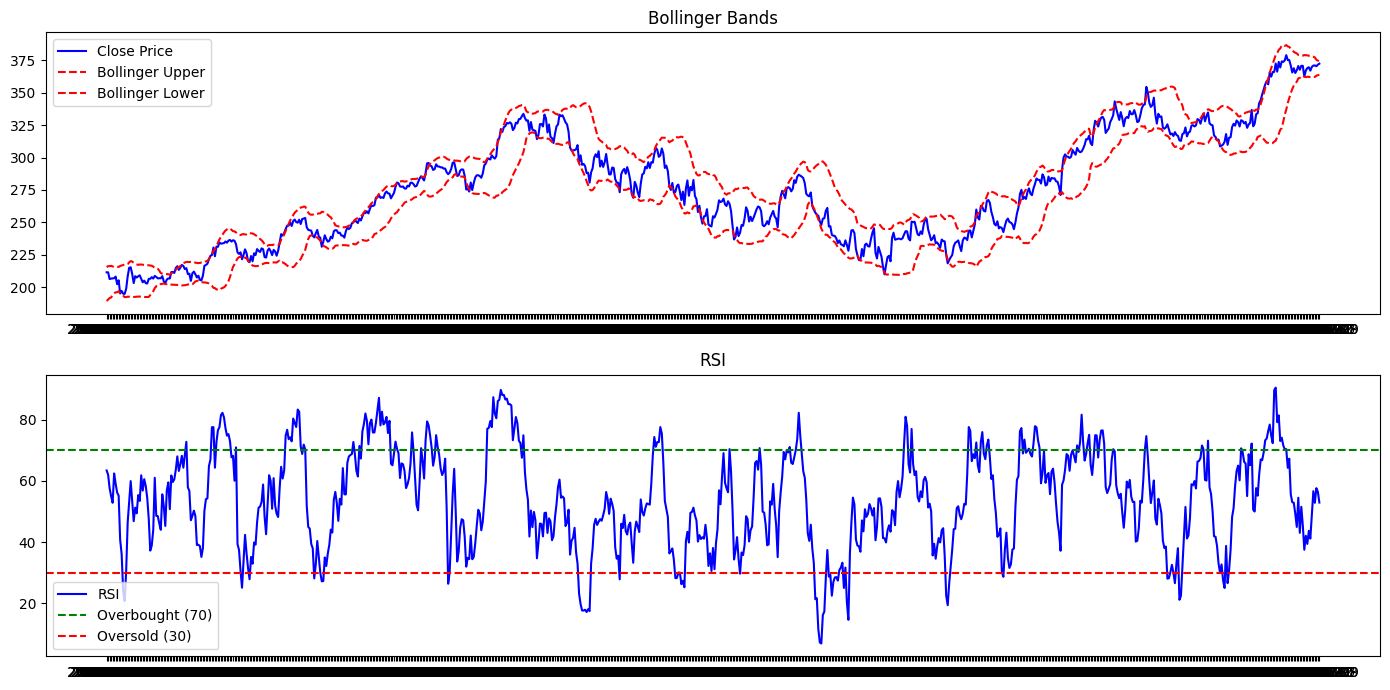

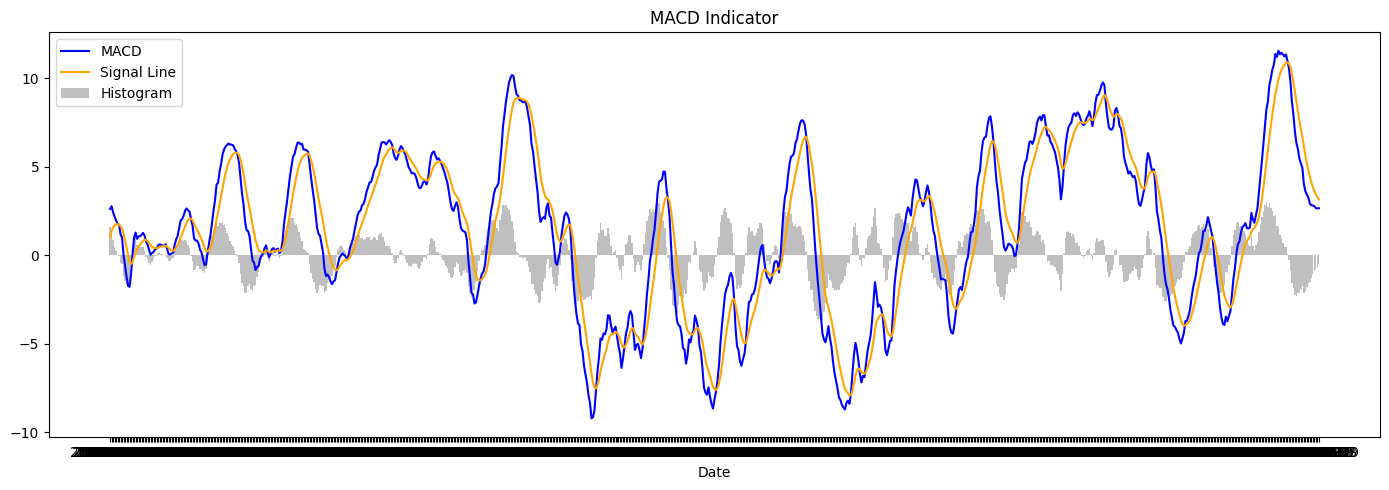

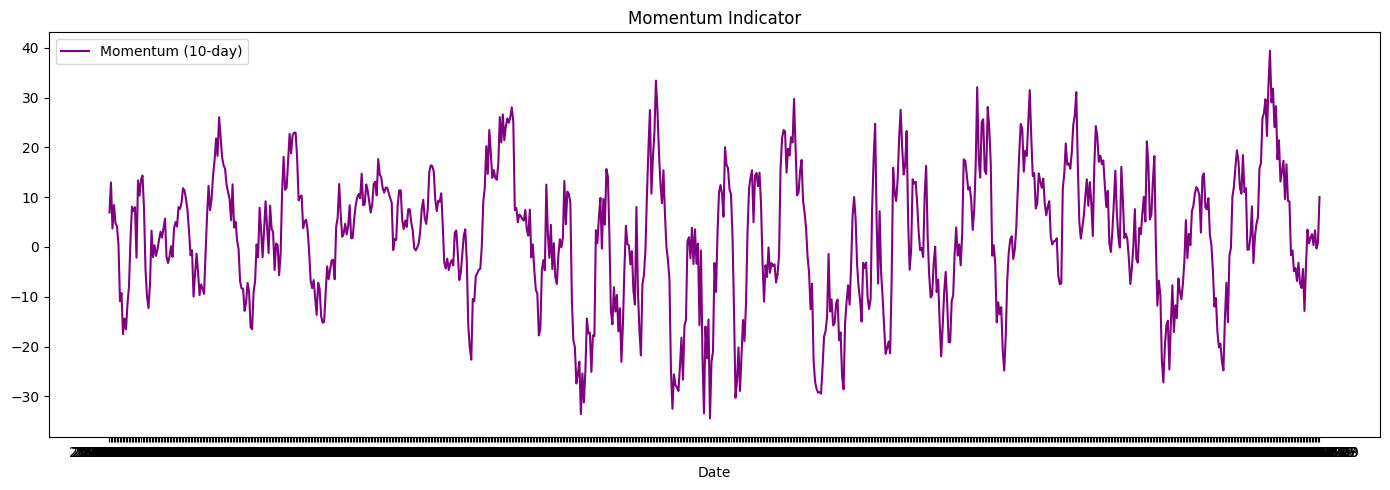

In [10]:
feature_engineering(ticker)

In [14]:
df = pd.read_csv(f"{ticker}_stock_features.csv")

In [15]:
df.head(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower,Momentum,MACD,MACD_Signal,MACD_Histogram
0,2020-10-15,211.349136,212.022649,207.837226,208.885997,22733100.0,206.238107,203.882422,197.775834,179.449973,63.430181,0.709805,215.381608,189.200984,6.927628,2.623857,1.009460,1.614396
1,2020-10-16,211.349136,213.879620,211.022004,211.820588,26057900.0,207.534148,203.956157,198.144232,179.740102,62.034904,0.816984,216.105458,190.331228,12.960403,2.773098,1.362188,1.410910
2,2020-10-19,206.114914,213.889206,205.633832,212.080332,27625800.0,207.903615,203.999500,198.464223,180.013606,57.611530,0.866247,216.103646,191.456846,3.694672,2.440877,1.577926,0.862951
3,2020-10-20,206.528656,209.145745,205.027681,207.635154,22753500.0,208.744543,204.132321,198.770594,180.287222,55.013910,0.719772,216.343596,191.912542,8.409286,2.185779,1.699496,0.486283
4,2020-10-21,206.673019,208.712804,205.056575,205.056575,22724900.0,209.222742,204.361517,199.082441,180.568480,52.846766,0.725162,215.881805,193.741574,4.781982,1.972523,1.754102,0.218421
5,2020-10-22,206.759552,207.885283,203.690245,205.835868,22351500.0,209.637425,204.480911,199.375187,180.838191,62.457015,0.715833,215.561160,195.187947,4.146835,1.789866,1.761255,0.028612
6,2020-10-23,208.048874,208.096985,205.095036,206.894279,18879600.0,209.677834,204.635498,199.676508,181.104803,59.120620,0.606082,215.699055,195.859234,0.404083,1.729214,1.754846,-0.025633
7,2020-10-26,202.131592,208.154738,200.226510,205.758957,37111600.0,208.588664,204.667899,199.942077,181.345408,56.177775,1.176902,215.677813,195.942057,-10.891693,1.189954,1.641868,-0.451914
8,2020-10-27,205.181641,206.547913,202.372121,203.584444,36700300.0,207.664024,204.734811,200.197064,181.592004,55.181821,1.151793,215.505959,196.690249,-9.246399,0.997204,1.512935,-0.515731
9,2020-10-28,195.011566,200.938505,194.453523,199.812774,51195600.0,205.914809,204.575091,200.339217,181.793239,40.775261,1.577151,216.260545,195.199608,-17.492157,0.023538,1.215056,-1.191518


In [16]:
df.tail(10)

,Date,Close,High,Low,Open,Volume,MA10,MA50,MA100,MA200,RSI,Norm_Volume,Bollinger_Upper,Bollinger_Lower,Momentum,MACD,MACD_Signal,MACD_Histogram
797,2023-12-15,367.241913,368.896183,362.833770,363.398414,78478200.0,367.742166,351.977508,336.662257,320.574624,42.050008,2.836525,379.023328,362.094522,-3.744476,3.618828,5.640908,-2.022080
798,2023-12-18,369.143890,369.490603,365.211241,365.974016,21802900.0,368.089868,352.889901,337.091155,321.163877,39.396490,0.790242,378.961564,362.433651,3.477020,3.421376,5.197001,-1.775625
799,2023-12-19,369.748138,369.748138,366.360303,367.994772,20603700.0,368.163174,353.763762,337.450630,321.748375,43.669309,0.746391,378.624354,362.356796,0.733063,3.275890,4.812779,-1.536889
800,2023-12-20,367.132965,372.492068,367.043815,371.471760,26316700.0,368.343463,354.613593,337.808121,322.333184,41.129911,0.949389,378.632846,362.105609,1.802887,2.915955,4.433414,-1.517460
801,2023-12-21,370.025482,370.887292,366.558413,369.054692,17708000.0,368.600024,355.441595,338.190394,322.934671,48.928142,0.639913,378.210317,362.101194,2.565613,2.831466,4.113025,-1.281559
802,2023-12-22,371.055664,371.650025,369.203263,370.164138,17091100.0,368.634692,356.315114,338.670176,323.548100,56.647082,0.618614,377.891416,362.137774,0.346680,2.815184,3.853456,-1.038273
803,2023-12-26,371.134949,373.393496,369.985859,371.471746,12673100.0,368.967532,357.258035,339.159037,324.180284,52.844237,0.461510,377.356461,362.281441,3.328400,2.776670,3.638099,-0.861429
804,2023-12-27,370.550537,371.531213,369.302382,370.174108,14905400.0,368.936829,358.092188,339.631005,324.783313,57.639951,0.545685,375.558003,363.225017,-0.307037,2.668232,3.444126,-0.775894
805,2023-12-28,371.749146,372.918036,370.639688,371.838295,14327000.0,369.026974,358.961780,340.091974,325.358523,56.453078,0.526055,374.849454,363.579926,0.901459,2.648482,3.284997,-0.636515
806,2023-12-29,372.501984,373.611441,369.966072,372.462352,18723000.0,370.028467,359.884985,340.600523,325.914612,52.916578,0.689710,374.174387,363.970693,10.014923,2.662882,3.160574,-0.497692
